In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sklearn as sk

In [41]:
df=pd.read_csv("abc.csv")
df.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [42]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

<Axes: >

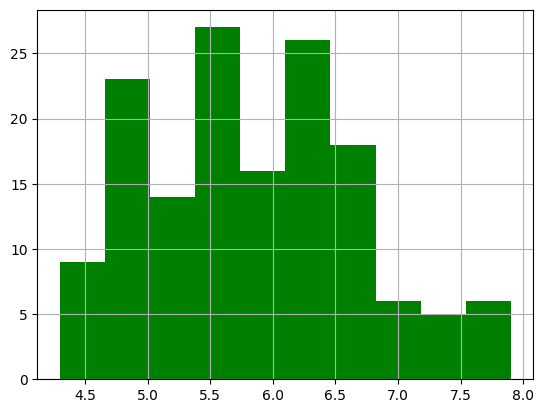

In [45]:
df['SepalLength'].hist(color='green')

<Axes: >

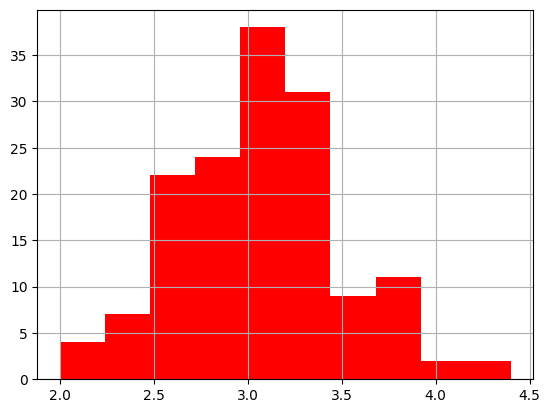

In [46]:
df['SepalWidth'].hist(color='red')

<Axes: >

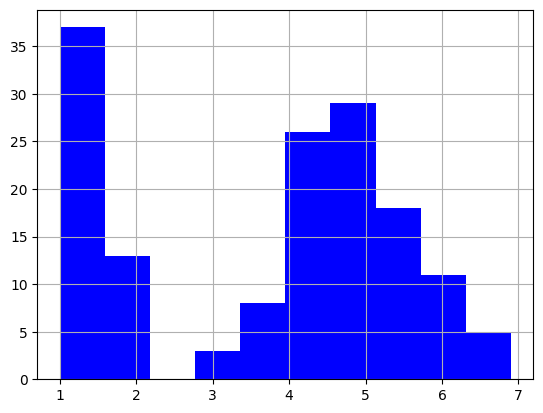

In [47]:
df['PetalLength'].hist(color='blue')

<Axes: >

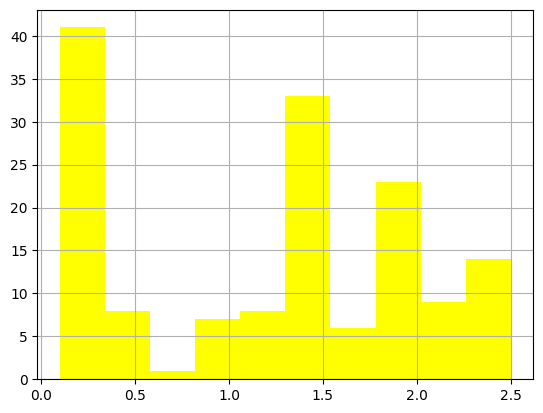

In [48]:
df['PetalWidth'].hist(color='yellow')

In histogram if its not bell shaped means it is not a normal distribution, so we can say that two classes are merged in that particular histo.
Keep in mind that if the distribution is normal,the model will be able to learn quickly

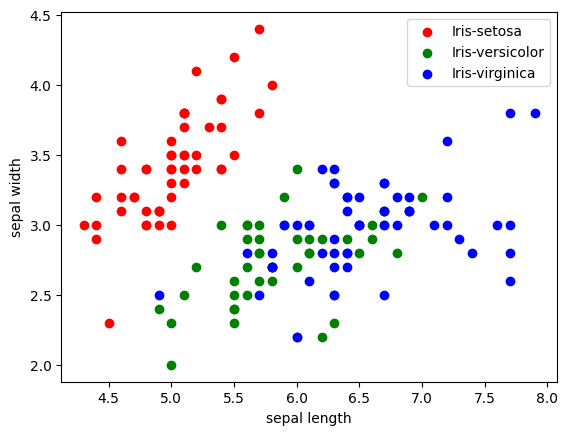

In [49]:
colors=['red','green','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["SepalLength"],x["SepalWidth"],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

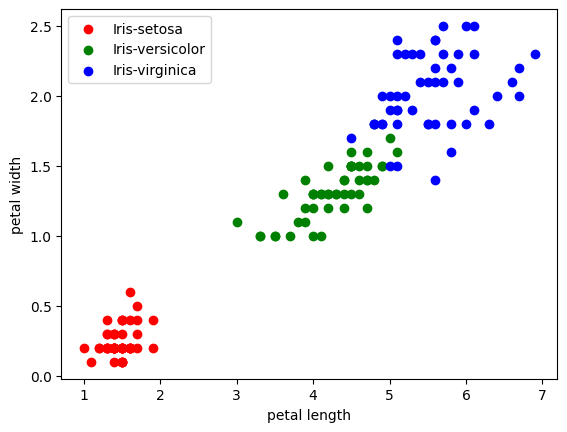

In [50]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["PetalLength"],x["PetalWidth"],c=colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

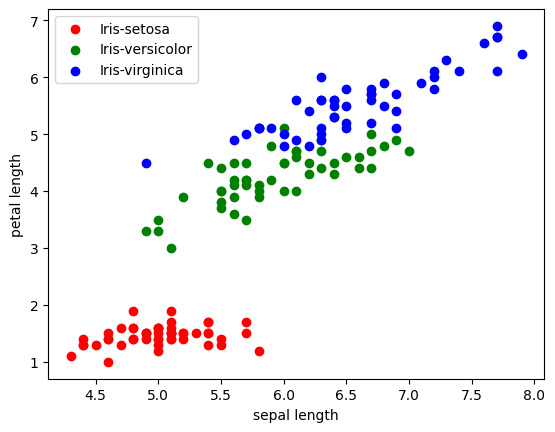

In [51]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["SepalLength"],x["PetalLength"],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

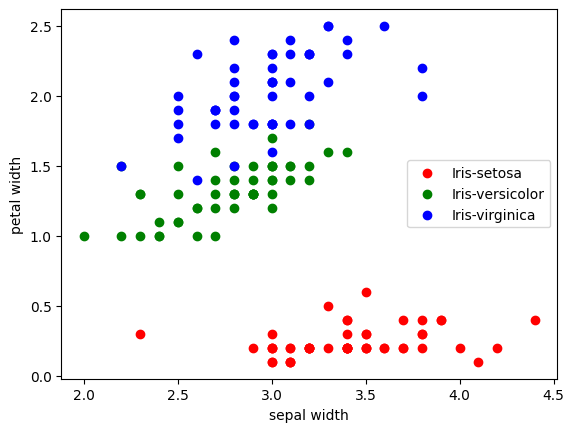

In [52]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["SepalWidth"],x["PetalWidth"],c=colors[i],label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

In [53]:
# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Now, you can use the correlation_matrix as needed
print(correlation_matrix)


             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000


<Axes: >

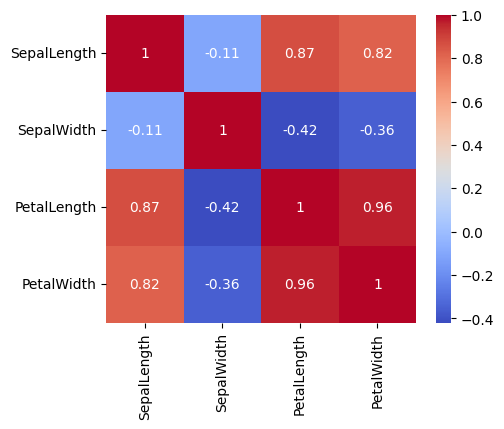

In [54]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,ax=ax,cmap="coolwarm")

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [58]:
model.fit(X_train,Y_train)

LogisticRegression()

In [59]:
model.score(X_test,Y_test)*100

100.0

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [61]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [62]:
model.score(X_test,Y_test)*100

100.0

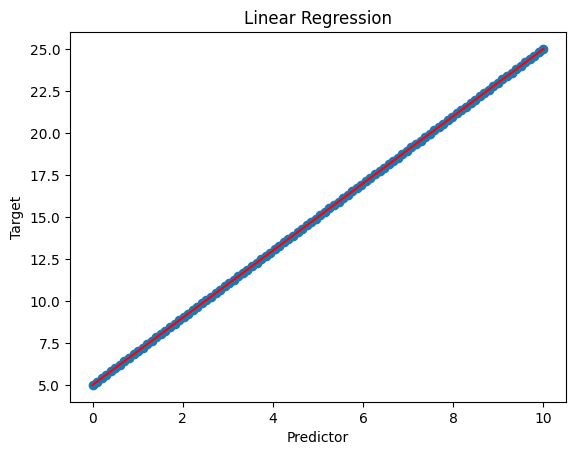

In [63]:
# Create some data
x = np.linspace(0, 10, 100)
y = 2 * x + 5

# Fit a linear regression model
model = np.polyfit(x, y, 1)

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, model[0] * x + model[1], color='red')

# Add labels and title
plt.xlabel('Predictor')
plt.ylabel('Target')
plt.title('Linear Regression')

# Show the plot
plt.show()

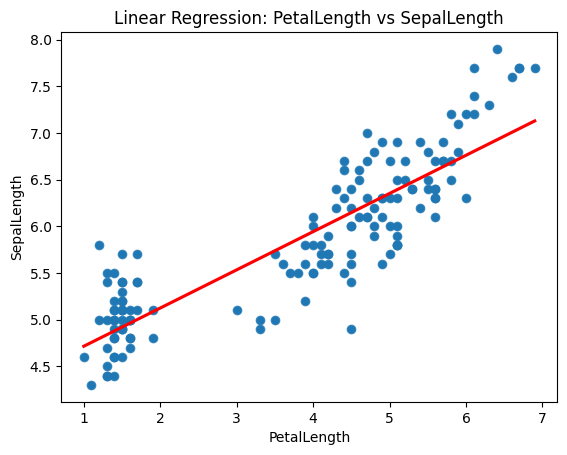

In [64]:
predictor_variable = 'PetalLength'
target_variable = 'SepalLength'

# Plot the scatter plot
sns.scatterplot(x=df[predictor_variable], y=df[target_variable])

# Perform linear regression and plot the regression line
sns.regplot(x=df[predictor_variable], y=df[target_variable], ci=None, line_kws={'color': 'red'})

# Set labels and title
plt.xlabel(predictor_variable)
plt.ylabel(target_variable)
plt.title('Linear Regression: {} vs {}'.format(predictor_variable, target_variable))

# Show the plot
plt.show()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Now, you can use the trained model to predict sepal length for a given petal length
given_petal_length = 1.5  # Replace with the actual petal length you want to predict for
predicted_sepal_length = model.predict([[given_petal_length]])

print(f'For Petal Length {given_petal_length}, Predicted Sepal Length: {predicted_sepal_length[0]}')

NameError: name 'LinearRegression' is not defined

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('abc.csv')

# Choose predictor and target variables
predictor_variable = 'PetalLength'
target_variable = 'SepalLength'

# Prepare the data
X = data[[predictor_variable]]
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Now, you can use the trained model to predict sepal length for a given petal length
given_petal_length = 10  # Replace with the actual petal length you want to predict for
predicted_sepal_length = model.predict([[given_petal_length]])

print(f'For Petal Length {given_petal_length}, Predicted Sepal Length: {predicted_sepal_length[0]}')


For Petal Length 10, Predicted Sepal Length: 8.353159953245921


C:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
